In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
directory = "D:\\211203 mass spec\\Srt mutants 4 hrs"

plate_map = map_path = "C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\reaction maps\\211214 Srt mutant CTB labelling 2 hours.xlsx"

In [4]:
eng.load_multi_single(directory, t0 = 2.0, t1 = 2.5)

Error: No HDF5 file present. Please create an HDF5 file first
Opening HDF5 File: .hdf5
Opening HDF5 File: .hdf5
10


In [5]:
# TIC/time point invalidation 
# add option to delete index in TIC data 
# add option to invalidate specific time/species 
# add option to plot bar chart instead of scatter/line - especially useful for comparison of diff species

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [15]:
eng.update_config(masslb = 10000, massub = 90000, peakthresh = 0.01, datanorm = 0, 
                 beta = 0, peaknorm = 1, exnorm = 1, numit=50, numz=50,
                 endz=50, startz=1,zzsig=1.0, psig=1.0,mzsig=1.0,psfun=0,msig=0.0,molig=0.0,
                 massbins=1.0,mtabsig=0.0, subbuff=0.0, subtype=2, mzbins=0.0, 
                 peakwindow=10.0, smooth = 0)
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Execution Time: 0.1278701999999612
Execution Time: 275.95879200000013
Execution Time: 222.41820499999994
Peak info saved to: UniDec_Figures_and_Files\.hdf5_extracts.txt


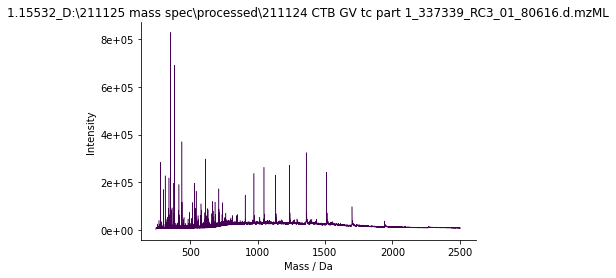

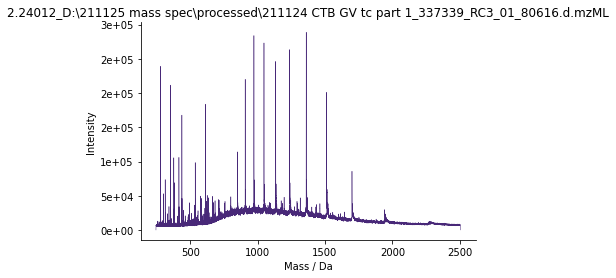

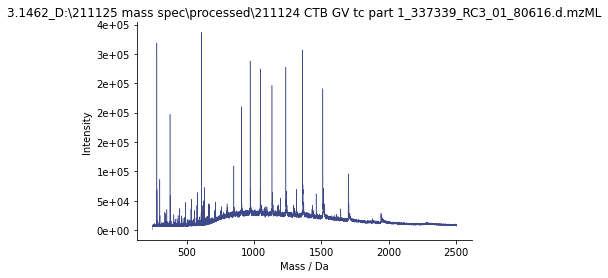

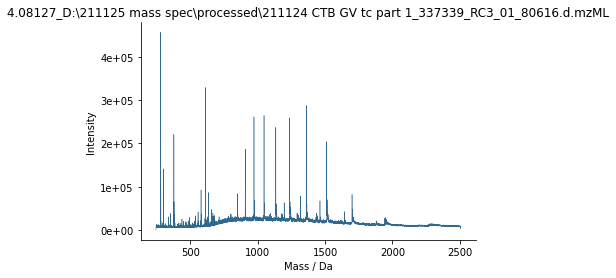

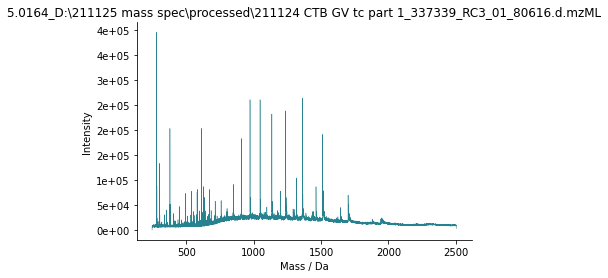

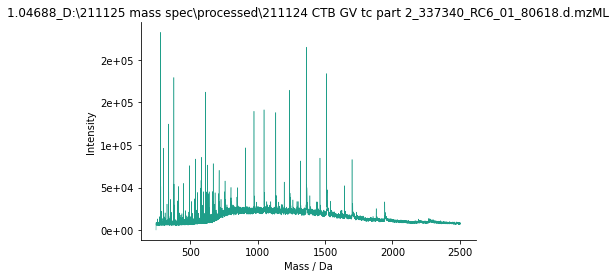

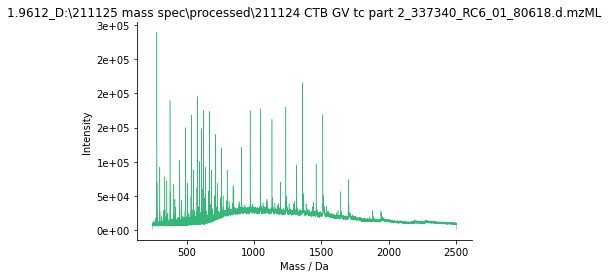

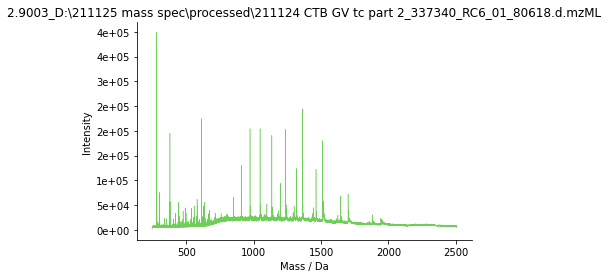

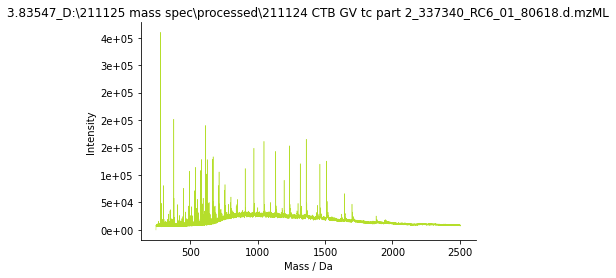

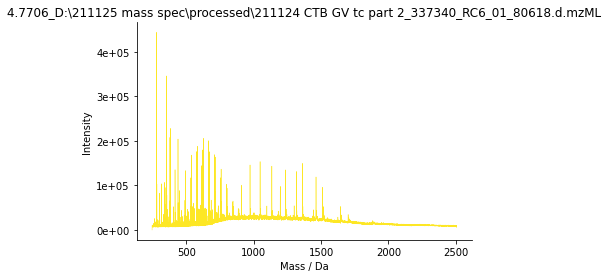

In [16]:
eng.plot_all(dtype = 'data2', combine = False, cmap = 'viridis')

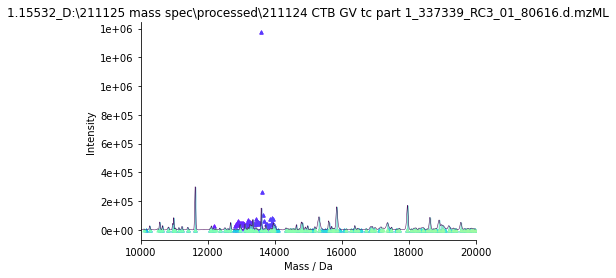

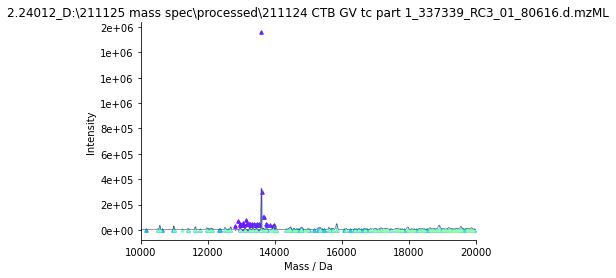

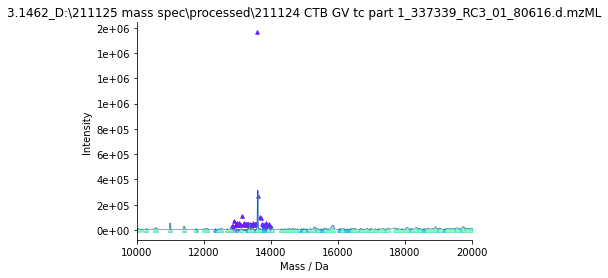

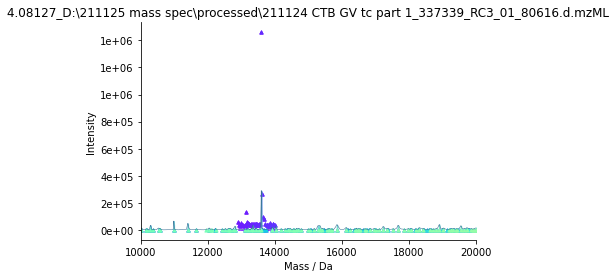

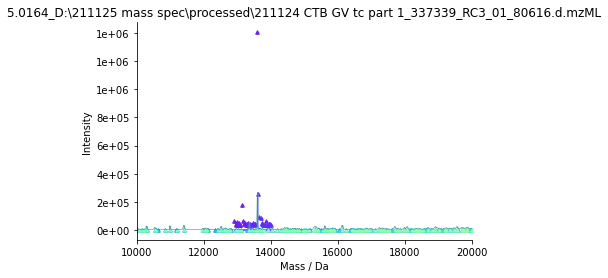

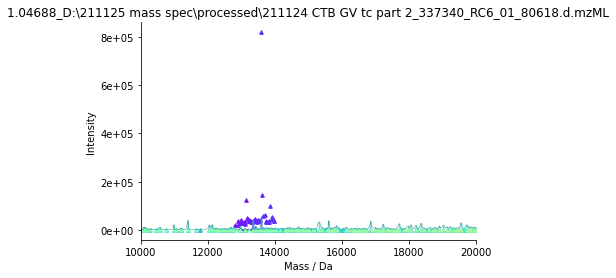

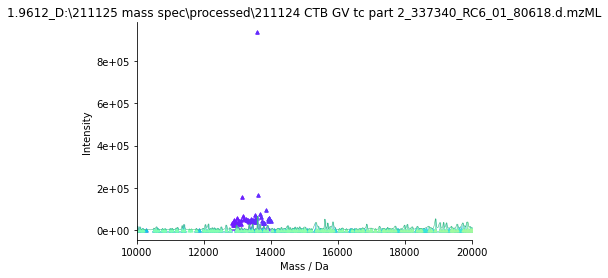

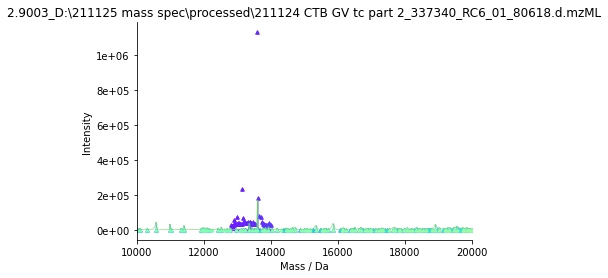

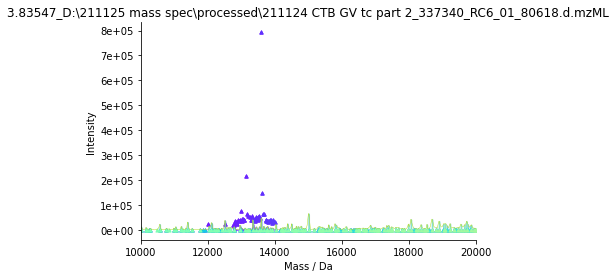

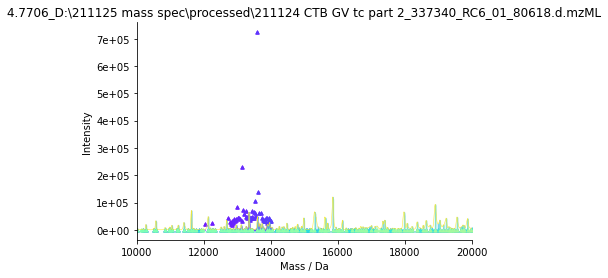

In [17]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [10000, 20000])

In [9]:
eng.upload_map(map_path)

(      Reaction     Species  Concentration Units      Mass Reagent_Type  \
 0  Srt mutants      CTB-H6          100.0    uM  13597.42      Protein   
 1  Srt mutants  CTB-GVSEYG            NaN    uM  13151.97      Protein   
 2  Srt mutants      CTB-OH            NaN    uM  12559.36      Protein   
 
   Sequence  
 0      NaN  
 1      NaN  
 2      NaN  ,
             Type     Reaction Time Sortase  Species  Valid
 Well ID                                                   
 1        Protein  Srt mutants    2      1M      NaN   True
 2        Protein  Srt mutants    2      2M      NaN   True
 3        Protein  Srt mutants    2      3M      NaN   True
 4        Protein  Srt mutants    2    1+3M      NaN   True
 5        Protein  Srt mutants    2      5M      NaN   True)

In [10]:
eng.pmap

,Type,Reaction,Time,Sortase,Species,Valid
Well ID,,,,,,
1,Protein,Srt mutants,2,1M,NaN,True
2,Protein,Srt mutants,2,2M,NaN,True
3,Protein,Srt mutants,2,3M,NaN,True
4,Protein,Srt mutants,2,1+3M,NaN,True
5,Protein,Srt mutants,2,5M,NaN,True


In [11]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,Srt mutants,CTB-H6,100.0,uM,13597.42,Protein,NaN
1,Srt mutants,CTB-GVSEYG,NaN,uM,13151.97,Protein,NaN
2,Srt mutants,CTB-OH,NaN,uM,12559.36,Protein,NaN


In [12]:
eng.process_maps(groupby = 'Reaction', variable = 'Sortase', matchfilenames = True)

In [13]:
eng.pmap2

,Type,Reaction,Time,Sortase,Species,Valid,CTB-GVSEYG,CTB-H6,CTB-OH
Well ID,,,,,,,,,
1,Protein,Srt mutants,2,1M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-..."
2,Protein,Srt mutants,2,2M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-..."
3,Protein,Srt mutants,2,3M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-..."
4,Protein,Srt mutants,2,1+3M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-..."
5,Protein,Srt mutants,2,5M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-..."


invalidate data using eng.invalidate()

In [14]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Sortase')

KeyError: 'Spectra'